In [1]:
import pandas as pd
import numpy as np

In [2]:
# ML Packages For Vectorization of Text For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
# Visualization Packages
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.getcwd()

'C:\\Users\\nitish kumar\\Desktop\\Mini_Project\\data'

In [5]:
# collecting all the datasets and concatenating them to a single dataframe
datasets=[]
for dirname, _, filenames in os.walk('../dataset/'):
    for filename in filenames:
        filepath=os.path.join(dirname, filename)
        print(filepath)
        datasets.append(filepath)
        
# creating a empty dataframe
youtube_data=pd.DataFrame()

# Merging with Keys
keys = ["Psy","KatyPerry","LMFAO","Eminem","Shakira"]

# adding all the datasets to the youtube_data dataframe
frame=[]
for i in datasets:
    frame.append(pd.read_csv(i))
youtube_data=pd.concat(frame, keys=keys)

../dataset/Youtube01-Psy.csv
../dataset/Youtube02-KatyPerry.csv
../dataset/Youtube03-LMFAO.csv
../dataset/Youtube04-Eminem.csv
../dataset/Youtube05-Shakira.csv


In [6]:
youtube_data.to_csv("YoutubeSpamMergeddata.csv")

In [7]:
youtube_data

COMMENT_ID  \
Psy     0    LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU   
        1    LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A   
        2    LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8   
        3            z13jhp0bxqncu512g22wvzkasxmvvzjaz04   
        4            z13fwbwp1oujthgqj04chlngpvzmtt3r3dw   
...                                                  ...   
Shakira 365  _2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA   
        366  _2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI   
        367  _2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs   
        368  _2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0   
        369  _2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA   

                           AUTHOR                        DATE  \
Psy     0               Julius NM         2013-11-07T06:20:48   
        1             adam riyati         2013-11-07T12:37:15   
        2        Evgeny Murashkin         2013-11-08T17:34:21   
        3         ElNino Melendez         2013-11-09T08:28:43   
        4                  GsMega         2013-11-10T16:05:38   
...                           ...                         ...   
Shakira 365          Katie Mettam  2013-07-13T13:27:39.441000   
        366  Sabina Pearson-Smith  2013-07-13T13:14:30.021000   
        367         jeffrey jules  2013-07-13T12:09:31.188000   
        368        Aishlin Maciel  2013-07-13T11:17:52.308000   
        369           Latin Bosch  2013-07-12T22:33:27.916000   

                                                       CONTENT  CLASS  
Psy     0    Huh, anyway check out this you[tube] channel: ...      1  
        1    Hey guys check out my new channel and our firs...      1  
        2               just for test I have to say murdev.com      1  
        3     me shaking my sexy ass on my channel enjoy ^_^ ﻿      1  
        4              watch?v=vtaRGgvGtWQ   Check this out .﻿      1  
...                                                        ...    ...  
Shakira 365  I love this song because we sing it at Camp al...      0  
        366  I love this song for two reasons: 1.it is abou...      0  
        367                                                wow      0  
        368                            Shakira u are so wiredo      0  
        369                         Shakira is the best dancer      0  

[1956 rows x 5 columns]

In [8]:
# Total Size
youtube_data.shape

(1956, 5)

In [9]:
# Checking for Only Comments on Shakira
youtube_data.loc['Eminem']

COMMENT_ID  \
0              z12rwfnyyrbsefonb232i5ehdxzkjzjs2   
1            z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04   
2              z13vsfqirtavjvu0t22ezrgzyorwxhpf3   
3            z12wjzc4eprnvja4304cgbbizuved35wxcs   
4              z13xjfr42z3uxdz2223gx5rrzs3dt5hna   
..                                           ...   
443  LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4   
444  LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8   
445  LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8   
446        z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k   
447          z13tsbc5vvn0hdozz04chjt51lq1cvris0k   

                             AUTHOR                        DATE  \
0                       Lisa Wellas                         NaN   
1                      jason graham  2015-05-29T02:26:10.652000   
2                        Ajkal Khan                         NaN   
3                     Dakota Taylor  2015-05-29T02:13:07.810000   
4                       Jihad Naser                         NaN   
..                              ...                         ...   
443                         Dany PK                         NaN   
444               SmexyFriedChicken                         NaN   
445  The Guy That's Done Everything                         NaN   
446                   Jesse Pinkman  2015-05-06T11:42:44.601000   
447                   Gaming Gaming  2015-05-06T10:56:35.972000   

                                               CONTENT  CLASS  
0            +447935454150 lovely girl talk to me xxx﻿      1  
1      I always end up coming back to this song<br />﻿      0  
2    my sister just received over 6,500 new <a rel=...      1  
3                                                Cool﻿      0  
4                       Hello I&#39;am from Palastine﻿      1  
..                                                 ...    ...  
443           SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE      1  
444  Check out my videos guy! :) Hope you guys had ...      1  
445  3 yrs ago I had a health scare but thankfully ...      1  
446       Rihanna looks so beautiful with red hair ;)﻿      0  
447  857.482.940 views AWESOME !!!!!!!!!!!!!!!!!!!!...      0  

[448 rows x 5 columns]

# Data Cleaning

In [10]:
df=youtube_data

In [11]:
df.describe().T

count      mean       std  min  25%  50%  75%  max
CLASS  1956.0  0.513804  0.499937  0.0  0.0  1.0  1.0  1.0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1956 entries, ('Psy', 0) to ('Shakira', 369)
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 105.9+ KB


In [13]:
# Check for missing nan
print(df.isnull().sum())
print("Total null values :::", df.isnull().sum().sum())

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64
Total null values ::: 245


In [14]:
# Removinging all the rows with null values
print("Shape of dataset before dropping null  :  ",youtube_data.shape )
youtube_data=youtube_data.dropna(axis =0)

print("\nShape of dataset after dropping null   :  ",youtube_data.shape ,"\n")
print(youtube_data)

Shape of dataset before dropping null  :   (1956, 5)

Shape of dataset after dropping null   :   (1711, 5) 

                                              COMMENT_ID  \
Psy     0    LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU   
        1    LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A   
        2    LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8   
        3            z13jhp0bxqncu512g22wvzkasxmvvzjaz04   
        4            z13fwbwp1oujthgqj04chlngpvzmtt3r3dw   
...                                                  ...   
Shakira 365  _2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA   
        366  _2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI   
        367  _2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs   
        368  _2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0   
        369  _2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA   

                           AUTHOR                        DATE  \
Psy     0               Julius NM         2013-11-07T06:20:48   
        1             adam riyati       

In [15]:
# Checking for Date
df["DATE"]

Psy      0             2013-11-07T06:20:48
         1             2013-11-07T12:37:15
         2             2013-11-08T17:34:21
         3             2013-11-09T08:28:43
         4             2013-11-10T16:05:38
                           ...            
Shakira  365    2013-07-13T13:27:39.441000
         366    2013-07-13T13:14:30.021000
         367    2013-07-13T12:09:31.188000
         368    2013-07-13T11:17:52.308000
         369    2013-07-12T22:33:27.916000
Name: DATE, Length: 1956, dtype: object

## Working With Text Content

In [16]:
# here the target variable is "CLASS"
# we are dealing with reviews whether they are spam or ham
# and also ratings to compare with predicted rating value and get the accuracy score
# so we consider only reviews and rating to be features for the dataframe
df_data = df[["CONTENT","CLASS"]]

In [17]:
# Checking for Consistent Column Name
df.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

In [18]:
df_data.columns

Index(['CONTENT', 'CLASS'], dtype='object')

In [19]:
df_data.head()

CONTENT  CLASS
Psy 0  Huh, anyway check out this you[tube] channel: ...      1
    1  Hey guys check out my new channel and our firs...      1
    2             just for test I have to say murdev.com      1
    3   me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
    4            watch?v=vtaRGgvGtWQ   Check this out .﻿      1

In [20]:
df_x = df_data['CONTENT']
df_y = df_data['CLASS']

## Data Preprocessing

Feature Extraction From Text

CountVectorizer



In [21]:
cv = CountVectorizer()
ex = cv.fit_transform(["Great song but check this out","What is this song?"])

In [22]:
ex.toarray()

array([[1, 1, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 1]], dtype=int64)

In [23]:
cv.get_feature_names()

['but', 'check', 'great', 'is', 'out', 'song', 'this', 'what']

In [24]:
# Extract Feature With CountVectorizer
corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus) # Fit the Data

In [25]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
# get the feature names
cv.get_feature_names()

['00',
 '000',
 '002',
 '018',
 '02',
 '034',
 '04',
 '047000',
 '05',
 '053012',
 '0687119038',
 '08',
 '09',
 '0cb8qfjaa',
 '0d878a889c',
 '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks',
 '0laviqu2b',
 '10',
 '100',
 '1000',
 '10000000',
 '1000000000',
 '100000415527985',
 '100005244783212',
 '100007085325116',
 '10001',
 '100877300245414',
 '101721377578919894134',
 '10200253113705769',
 '1030',
 '104999962146104962510',
 '10626048',
 '10626835',
 '106865403',
 '107297364',
 '1073741825',
 '1073741828',
 '1073741830',
 '1073741943',
 '108k',
 '109',
 '10b35481',
 '11',
 '1111',
 '1111111111111111111',
 '111719098841907',
 '111982027348137311818',
 '112720997191206369631',
 '11cpwb',
 '11th',
 '12',
 '123',
 '124',
 '124923004',
 '126',
 '127',
 '128gb',
 '12year',
 '13',
 '13017194',
 '131275322914',
 '131338190916',
 '1337',
 '1340488',
 '1340489',
 '1340490',
 '1340491',
 '1340492',
 '1340493',
 '1340494',
 '1340499',
 '1340500',
 '1340502',
 '1340503',
 '134

In [27]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

STOPWORDS=stopwords.words("english")
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\nitish
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# required words are
required=["not" ,"no" ,"nor","must","mustn't","couldn't",'wouldn', 'm', 'who', 'same', 'whom', 'his', 'while', 'at', "you're", 'by', 'above', "hadn't", 'below', 'isn', 'won', 'them', 'this', 'as', 'your', 'once', 'ours', 'hers', 'a', 'myself', 'both', 'hadn', 'didn', 'her', "shan't", 'himself', 'more', 'can', 'up']  #,"out","most","too","very"

STOPWORDS=list(set(STOPWORDS)-set(required))
type(set(STOPWORDS))
print("Final Stopwords  :::",STOPWORDS)

Final Stopwords  ::: ['from', 'just', 'through', 'y', "you'd", "should've", 'doesn', 'further', 'own', 'ourselves', 's', "that'll", "it's", "haven't", "mightn't", 'shouldn', 'he', 'they', 'hasn', 'don', 'about', 'had', 'too', 'are', 'doing', 're', 'again', 'ain', "won't", 'll', 'off', 'that', 'did', 've', 'shan', 'themselves', 'into', 'couldn', 'theirs', 'am', 'him', 'my', 'in', 'few', 'were', 'these', 'have', 'yourselves', 'such', 'me', 'how', 'does', 'do', 'before', 'should', 'which', 'has', 'being', 'all', 'then', 'ma', 'it', 'those', 'between', 'when', 'if', "doesn't", "didn't", 't', "you'll", 'what', 'you', "isn't", 'where', 'any', 'aren', 'or', 'to', 'after', 'and', 'o', 'mightn', 'be', 'will', 'here', 'there', "don't", 'than', 'their', 'with', 'down', 'wasn', 'our', 'an', 'the', 'only', 'we', 'until', "weren't", 'now', 'but', 'haven', 'needn', 'was', 'is', 'over', 'so', 'having', 'she', 'weren', 'on', 'each', "aren't", 'herself', 'out', 'some', 'mustn', 'd', "wouldn't", 'why', '

In [29]:
import string
import re
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
print(stemmer.stem('dogs'))


def deEmojify(inputString):#to remove emojis in the text.
    try:
        return inputString.encode('ascii', 'ignore').decode('ascii') 
    except:
          return inputString
##
   
def filter_text(text):
    text=text.strip('\n')
    text=deEmojify(str(text))
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    
    
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    
    tokens=[stemmer.stem(token) for token in tokens]
    tokens=[token for token in tokens if token.isalpha()]
    tokens=[token for token in tokens if token not in STOPWORDS]
    
    # Taking only those words which are not stopwords
    text_cleaned = ' '.join([str(token) for token in tokens]) 
    
    return text_cleaned
print (filter_text("i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿"))

dog
turn mute as soon came want check view


# Model Building

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, x_test, Y_train, y_test = train_test_split(X, df_y, test_size=0.33, random_state=42,shuffle=True)



Multinomial Naive Bayes Classifier
Accuracy                ::: 0.9195046439628483
Confusion matrix        :::
[[279  30]
 [ 22 315]]

classification report   :::
              precision    recall  f1-score   support

        Spam       0.93      0.90      0.91       309
         Ham       0.91      0.93      0.92       337

    accuracy                           0.92       646
   macro avg       0.92      0.92      0.92       646
weighted avg       0.92      0.92      0.92       646



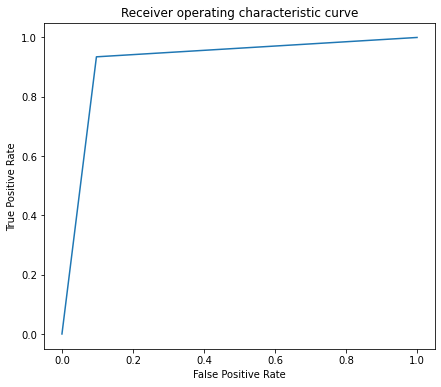

In [38]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()

#fitting the model
mnb.fit(X_train,Y_train)

## Predicting with our model
predictions=mnb.predict(x_test)

accuracy =accuracy_score (y_test,predictions)

print("\n\nMultinomial Naive Bayes Classifier")
print("Accuracy                :::", accuracy)

#Generating Confusion matrix
print("Confusion matrix        :::")
print(confusion_matrix(y_test, predictions))

#Calculating Precision, Recall and Measure
print("\nclassification report   :::")
print(classification_report(y_test, predictions, target_names=["Spam", "Ham"]))

#Generating ROC curve
false_positive, true_positive,_= roc_curve(y_test,predictions)
plt.figure(figsize=(7,6))
plt.title("Receiver operating characteristic curve")
plt.plot(false_positive, true_positive)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()



In [39]:
# Accuracy of our Model
print("Accuracy of Multinomial Naive Bayes Classifier",round(accuracy*100,4),"%")

Accuracy of Multinomial Naive Bayes Classifier 91.9505 %


In [40]:
# Sample Prediciton
comment = ["this is cool but check this out!"]
vect = cv.transform(comment).toarray()

In [41]:
mnb.predict(vect)

array([1], dtype=int64)

In [42]:
class_dict = {0:'ham',1:'spam'}

In [43]:
class_dict.values()

dict_values(['ham', 'spam'])

In [44]:
print(class_dict[mnb.predict(vect)[0]])

spam


In [45]:
# Sample Prediciton 2
comment1 = ["Great song Friend"]
vect = cv.transform(comment1).toarray()
mnb.predict(vect)
print(class_dict[mnb.predict(vect)[0]])

ham




Random Forest Classifier
Accuracy of Random Forest Classifier  95.9752 %
Confusion matrix        :::
[[307   2]
 [ 24 313]]

classification report   :::
              precision    recall  f1-score   support

        Spam       0.93      0.99      0.96       309
         Ham       0.99      0.93      0.96       337

    accuracy                           0.96       646
   macro avg       0.96      0.96      0.96       646
weighted avg       0.96      0.96      0.96       646



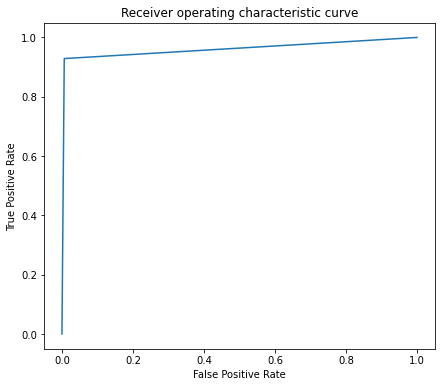

In [46]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

#fitting the model
rf.fit(X_train,Y_train)

## Predicting with our model
predictions=rf.predict(x_test)

accuracy =accuracy_score (y_test,predictions)

print("\n\nRandom Forest Classifier")
print("Accuracy of Random Forest Classifier ",round(accuracy*100,4),"%")

#Generating Confusion matrix
print("Confusion matrix        :::")
print(confusion_matrix(y_test, predictions))

#Calculating Precision, Recall and Measure
print("\nclassification report   :::")
print(classification_report(y_test, predictions, target_names=["Spam", "Ham"]))

#Generating ROC curve
false_positive, true_positive,_= roc_curve(y_test,predictions)
plt.figure(figsize=(7,6))
plt.title("Receiver operating characteristic curve")
plt.plot(false_positive, true_positive)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [47]:
class_dict = {0:'ham',1:'spam'}

In [48]:
class_dict.values()

dict_values(['ham', 'spam'])

In [49]:
print(class_dict[rf.predict(vect)[0]])

ham
